Gayatri Kulkarni -53004230002
Generation 1: Best Fit - 0111011010 with Fitness 8
Generation 2: Best Fit - 1101100110 with Fitness 9
Generation 3: Best Fit - 1101110010 with Fitness 9
Generation 4: Best Fit - 1000110110 with Fitness 10
Generation 5: Best Fit - 11010110110 with Fitness 10
Generation 6: Best Fit - 1000110110 with Fitness 10
Generation 7: Best Fit - 1000110110 with Fitness 10
Generation 8: Best Fit - 11001101110 with Fitness 10
Generation 9: Best Fit - 1100110110 with Fitness 10
Generation 10: Best Fit - 1100110110 with Fitness 10
Generation 11: Best Fit - 1100110110 with Fitness 10
Generation 12: Best Fit - 1100110110 with Fitness 10
Generation 13: Best Fit - 1100110110 with Fitness 10
Generation 14: Best Fit - 1100110110 with Fitness 10
Generation 15: Best Fit - 11000110110 with Fitness 10
Generation 16: Best Fit - 1100110110 with Fitness 10
Generation 17: Best Fit - 1100110110 with Fitness 10
Generation 18: Best Fit - 1100110110 with Fitness 10
Generation 19: Best Fit -

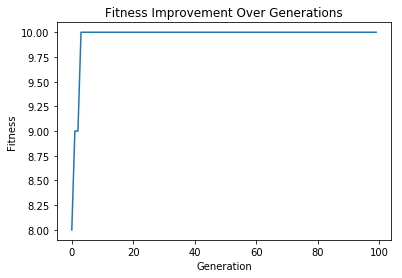

In [6]:
# Solving Travelling Salesman problem using Genetic Algorithm
import random
import matplotlib.pyplot as plt

# Genetic Algorithm Parameters
Population_size = 20
Genes = ['0', '1']
Target_city = '1100110110'
Mutation_rate = 0.1

# define a fitness function
def calculate_fitness(chromosome):
    fitness = sum(1 for a, b in zip(chromosome, Target_city) if a == b)
    return fitness

# create initial population
def create_population(population_size, genes, target_city):
    population = []
    for _ in range(population_size):
        chromosome = ''.join(random.choice(genes) for _ in range(len(target_city)))
        population.append(chromosome)
    return population

# Apply mutation to the population
def mutate_population(population, mutation_rate, genes):
    for i in range(len(population)):
        if random.random() < mutation_rate:
            idx = random.randint(0, len(population[i])-1)
            population[i] = population[i][:idx] + random.choice(genes) + population[i][idx:]
    return population

# Perform selection using tournament selection
def tournament_selection(population, fitness_values, k=3):
    selected = []
    for _ in range(len(population)):
        participants = random.sample(list(enumerate(fitness_values)), k)
        winner = max(participants, key=lambda x: x[1])[0]
        selected.append(population[winner])
    return selected

# Main genetic algorithm loop
def genetic_algorithm():
    population = create_population(Population_size, Genes, Target_city)
    best_fitness = []
    for generation in range(100):
        fitness_values = [calculate_fitness(chromosome) for chromosome in population]

        # Select the best fit individuals for reproduction
        selected_population = tournament_selection(population, fitness_values)

        # Apply Crossover
        next_generation = []
        for i in range(0, Population_size, 2):
            crossover_point = random.randint(1, len(Target_city)-1)
            child1 = selected_population[i][:crossover_point] + selected_population[i+1][crossover_point:]
            child2 = selected_population[i+1][:crossover_point] + selected_population[i][crossover_point:]
            next_generation.extend([child1, child2])

        # Mutate the population
        mutated_population = mutate_population(next_generation, Mutation_rate, Genes)
        population = mutated_population

        best_fit = max(list(zip(population, fitness_values)), key=lambda x: x[1])
        best_fitness.append(best_fit[1])

        print(f'Generation {generation + 1}: Best Fit - {best_fit[0]} with Fitness {best_fit[1]}')

    # Plotting the fitness improvement over generations
    plt.plot(best_fitness)
    plt.title('Fitness Improvement Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()
# Run the genetic algorithm
print('Gayatri Kulkarni -53004230002')
genetic_algorithm()